In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
a=0
b=1
A=-10
B=10

bb=1
mu=0.52
dx=0.05
dt=(1/bb)*(mu*dx**2)
Nx=int((B-A)/dx) ## intervals in space
Nt=int((b-a)/dt)## intervals in time
Nt

769

In [45]:
x=np.linspace(A,B,Nx+1)## discretize space domain
t=np.linspace(a,b,Nt+1) ## discretize time domain

In [46]:
U0=np.zeros(Nx+1)
for i in range(Nx+1):
    U0[i]=max(1-x[i]**2,0)

In [47]:
U=np.zeros((Nx+1,Nt+1))
U[:,0]=U0

In [48]:
for n in range (1,Nt+1):
    for j in range(Nx+1):
        if j==0 or j==Nx:
            U[j,n]=0
        else:
            U[j,n]=mu*U[j-1,n-1] + (1-2*mu)*U[j,n-1]+mu*U[j+1,n-1]
    

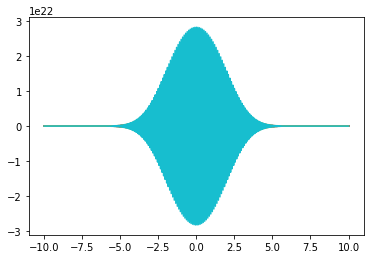

In [49]:
for i in range(Nt+1):
    plt.plot(x,U[:,i])
    

In [63]:
A1=(1+2*mu)*np.ones(Nx-1)
A2=(-mu)*np.ones(Nx-2)

A=np.diag(A1)+ np.diag(A2,1)+ np.diag(A2,-1)
A.shape

(399, 399)

In [67]:
F=U0[1:Nx-1]

In [53]:
Uu=np.zeros((Nx+1,Nt+1))
Uee=np.zeros(Nx+1)
Uu[:,0]=U0
for i in range (1,Nt+1):
    U0=Uu[:,i-1]
    Ue=np.linalg.inv(A)@U0[1:Nx]
    Uee[1:Nx]=Ue
    Uu[:,i]=Uee
 

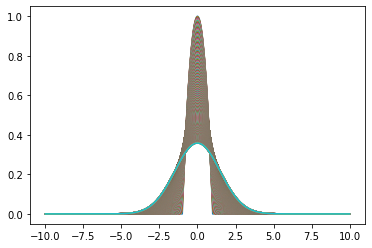

In [54]:
for i in range(Nt+1):
    plt.plot(x,Uu[:,i])